In [44]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# A first glimpse to the data files

In [45]:
! ls

APS Failure - Data Analysis.ipynb   aps_failure_training_set.csv
Data Intake Report_APS Failure.docx test_standardized.csv
Notes                               train_standardized.csv
aps_failure_description.txt         ~$ta Intake Report_APS Failure.docx
aps_failure_test_set.csv


In [46]:
train = pd.read_csv('aps_failure_training_set.csv', skiprows=20)
test = pd.read_csv('aps_failure_test_set.csv', skiprows=20)

In [47]:
train.shape

(60000, 171)

In [48]:
train.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [49]:
test.shape

(16000, 171)

In [50]:
test.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

# Feature Engineering - building a useful dataset

## Train dataframe

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [52]:
pd.set_option('max_columns', None)
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

### Target variable

In [53]:
train['class'].unique()

array(['neg', 'pos'], dtype=object)

In [54]:
train['class'].replace(['neg', 'pos'], [0,1], inplace=True)
train['class'].astype('int64').dtypes

dtype('int64')

### Missing values

In [55]:
'''
the null values are represented by "na"
they'll be replaced by np.nan to be understood by the code
then we'll impute those
''' 

print('"na" in the df:',train.isin(['na']).any().sum(),'these will be replaced')
train.replace('na', np.nan, inplace=True)

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
cols = train.columns
train = pd.DataFrame(mean_imputer.fit_transform(train), columns=cols)

print('null values have been replaced by the mean of that feature variable')

"na" in the df: 169 these will be replaced
null values have been replaced by the mean of that feature variable


In [56]:
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.000000,353400.000000,299160.000000,305200.000000,283680.000000,551389.799347,582871.32293,604886.613264,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.000000,96.000000,0.000000,5245752.00,0.00,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.000000,240.0,6700214.0,37.06298,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.000000,734.000000,4.122704e+06,51288.000000,0.000000,532572.000000,0.000000,18.000000,5.330690e+06,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.000000,359780.000000,366560.000000,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,190221.810984,91.520415,0.000443,2291079.36,0.00,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,190515.566938,0.0,3646660.0,37.06298,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,749.091271,1222.960989,1.928825e+06,351510.236231,274.179338,19374.290483,7.393791,13.416652,2.200752e+06,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,217363

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(171)
memory usage: 78.3 MB


## Test dataframe

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [59]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

### Target variable

In [60]:
test['class'].unique()

array(['neg', 'pos'], dtype=object)

In [61]:
test['class'].replace(['neg', 'pos'], [0,1], inplace=True)
test['class'].astype('int64').dtypes

dtype('int64')

### Missing values

In [62]:
'''
the null values are represented by "na"
they'll be replaced by np.nan to be understood by the code
then we'll impute those
''' 

print('"na" in the df:',test.isin(['na']).any().sum(),'these will be replaced')
test.replace('na', np.nan, inplace=True)

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
cols = test.columns
test = pd.DataFrame(mean_imputer.fit_transform(test), columns=cols)

print('null values have been replaced by the mean of that feature variable')

"na" in the df: 169 these will be replaced
null values have been replaced by the mean of that feature variable


In [63]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,434.0,76.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,8762.0,2566.0,480.0,380.0,196.0,516.0,86.0,66.0,74.0,0.0,124340.0,4.0,6.0,4.0,0.0,3976.0,318.0,107662.0,3458.0,280200.504745,320483.011169,400614.715805,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,110980.0,59.53,124340.0,124340.0,184970.0,54.0,686.0,12246.0,123880.0,13196.0,1209600.0,598.0,0.0,6.0,0.0,5913.60,0.00,5851.20,6.0,30.0,0.0,2.0,5512.0,4674.0,1388.0,1508.0,38.0,4.0,0.0,0.0,8.0,12.0,124340.0,0.000000,1550.0,14.0,36.0,26.0,920.0,430.0,7650.0,2294.0,206.0,0.0,22.0,42.0,5336.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,44.0,50.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,12564.0,1756.0,638.0,276.0,172.0,132.0,812.0,308.0,192.0,128.0,46894.0,4.0,2.0,38.0,0.0,5244.0,360.0,20520.0,3134.0,280200.504745,320483.011169,400614.715805,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,23320.0,81.89,46894.0,46894.0,48324.0,68.0,0.0,4486.0,46480.0,17050.0,1209600.0,726.0,2.0,4.0,0.0,7224.96,0.00,7768.32,0.0,42.0,0.0,0.0,4.0,7064.0,6200.0,2452.0,1246.0,12.0,0.0,0.0,14.0,54.0,46894.0,0.000000,2202.0,28.0,114.0,350.0,700.0,1708.0,9622.0,2174.0,80.0,0.0,80.0,206.0,7802.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,894.0,1162.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,1662580.0,667960.0,387998.0,226078.0,161558.0,148288.0,154908.0,220820.0,147744.0,210866.0,4644422.0,958.0,7848.0,3624.0,0.0,1891670.0,47066.0,692800.0,265492.0,336240.000000,194360.000000,245240.000000,457347.105202,503282.157837,538685.709058,567845.94899,587884.465343,175480.0,66002.89,4644422.0,4644422.0,4608738.0,22706.0,2272.0,95510.0,1006260.0,3991552.0,1209600.0,126310.0,0.0,104.0,0.0,359488

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(171)
memory usage: 20.9 MB


## Detecting possible outliers

### Train dataset

In [65]:
train_standardized = train.copy()
test_standardized = test.copy()

In [66]:
train_standardized = np.abs(stats.zscore(train))
train_standardized

/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[1.30188911e-01, 1.19381409e-01, 6.68577764e-17, ...,
        1.77716748e-01, 2.12203571e-02, 2.46591416e-02],
       [1.30188911e-01, 1.80696612e-01, 6.68577764e-17, ...,
        1.45939679e-01, 2.12203571e-02, 2.46591416e-02],
       [1.30188911e-01, 1.25810664e-01, 6.68577764e-17, ...,
        1.66827806e-01, 2.12203571e-02, 2.46591416e-02],
       ...,
       [1.30188911e-01, 4.07240391e-01, 4.29483052e-01, ...,
        1.77716748e-01, 2.12203571e-02, 2.46591416e-02],
       [1.30188911e-01, 1.44094526e-01, 6.68577764e-17, ...,
        8.05089181e+00, 2.12203571e-02, 2.46591416e-02],
       [1.30188911e-01, 1.31435408e-01, 6.68577764e-17, ...,
        1.74369563e-01, 2.12203571e-02, 2.46591416e-02]])

In [67]:
'''
We'll be using z score >= 3 to determine possible outliers
'''
threshold = 3
print(np.where(train_standardized > 3))

(array([    3,     7,     7, ..., 59973, 59985, 59998]), array([170, 130, 145, ...,   2, 138, 168]))


In [68]:
print('I determined there are',np.where(train_standardized > 3)[0].shape[0],'possible outliers in the dataframe')

I determined there are 121424 possible outliers in the dataframe


### Test dataset

In [69]:
test_standardized = np.abs(stats.zscore(test))
test_standardized

array([[0.15491933, 0.13492431, 0.62550704, ..., 0.16158618, 0.01972822,
        0.01734317],
       [0.15491933, 0.13488062, 0.62550704, ..., 0.16158618, 0.01972822,
        0.01734317],
       [0.15491933, 0.00396208, 0.99484132, ..., 0.16158618, 0.01972822,
        0.01734317],
       ...,
       [0.15491933, 0.02311534, 0.        , ..., 0.20740398, 0.01972822,
        0.01734317],
       [0.15491933, 0.13482501, 0.        , ..., 0.16158618, 0.01972822,
        0.01734317],
       [0.15491933, 0.13502758, 0.62550704, ..., 0.16158618, 0.01972822,
        0.01734317]])

In [70]:
threshold = 3
print(np.where(test_standardized > 3))

(array([    2,    34,    34, ..., 15994, 15994, 15994]), array([ 49, 110, 111, ..., 118, 134, 138]))


In [71]:
print('I determined there are',np.where(test_standardized > 3)[0].shape[0],'possible outliers in the dataframe')

I determined there are 33364 possible outliers in the dataframe


## Standardizing the dataset - getting the definitive one

In [72]:
train['class'] = train['class'].astype('int')
test['class'] = test['class'].astype('int')

In [73]:
standardizer = StandardScaler()

train.iloc[:,1:] = standardizer.fit_transform(train.iloc[:,1:])
test.iloc[:,1:] = standardizer.fit_transform(test.iloc[:,1:])

In [74]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.119381,-6.685778e-17,2.297451,-5.431343e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.169358,0.100019,0.516109,0.359332,-0.044190,-0.030318,0.178174,-0.055517,-0.022830,-0.013418,-0.110201,-0.110392,0.190006,0.096188,0.248009,0.548965,-0.092277,-0.011572,-0.042627,-0.014671,-0.016383,-0.073255,-0.02702,-0.019145,-0.025767,-0.035195,-0.029963,0.257461,0.969508,-0.165974,-0.074395,-0.011935,-0.033809,-0.068423,-0.037283,-0.115293,-0.207098,0.527821,-0.111227,-0.062301,-0.044592,-0.012993,0.247406,0.054957,0.001964,0.017767,0.196603,0.972801,1.433796,-0.348983,-0.148115,-0.107280,0.200780,-0.144076,-0.193094,-0.139665,-0.046478,0.178526,0.261408,0.308108,0.159783,0.245399,0.135943,-4.226475e-01,-0.66111,-9.667438e-01,0.0,0.0,-1.005881e-15,1.168814,0.118984,0.202359,0.202359,0.247122,0.400473,-0.054201,0.420900,0.633874,0.252585,0.0,1.300816,-0.005428,1.389469e-02,-1.716215e-02,0.211771,-0.090853,0.092996,-0.078090,1.021445,-0.038412,-0.089823,-0.150837,-0.187552,0.007980,0.609652,0.754448,0.085116,-0.043298,-0.023447,-0.005430,-0.043505,0.202359,0.000000,0.487133,0.152456,0.024147,0.150677,-0.007493,0.318959,0.300834,0.145203,-0.009285,-0.00425,-4.429371e-02,-0.073005,6.830015e-01,-2.261857e-01,-0.035493,2.366251,-4.423805e-02,7.116239e-02,0.867911,0.172611,0.454990,-0.020492,-0.027844,-0.008697,-0.090631,-0.00912,-0.028932,-0.026966,-0.029553,0.294877,0.959105,1.894540,-0.047556,-0.152668,0.555789,0.682076,0.945587,0.630339,-0.195085,-0.134414,-0.020407,-0.029976,-0.167479,0.339261,0.389777,0.096754,0.361170,0.691902,0.522440,0.236978,0.068038,0.005736,-0.109591,-0.146551,-0.177717,-0.021220,-0.024659
1,0,-0.180697,-6.685778e-17,-0.460883,8.304736e-19,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.177404,-0.140271,0.016201,0.012309,-0.017942,-0.030318,-0.100064,-0.055517,-0.021473,-0.013418,-0.110201,-0.110392,-0.116170,-0.128987,0.026186,-0.082675,-0.092277,-0.011572,-0.042627,-0.014671,-0.173048,-0.257896,-0.02702,-0.019145,-0.025767,-0.035195,-0.029963,-0.029183,-0.093798,0.088802,-0.239771,-0.011935,-0.007014,0.100194,0.053867,-0.114157,-0.112201,-0.040735,-0.097426,-0.062294,-0.044592,-0.012993,-0.005612,-0.191620,-0.179605,-0.160850,-0.126122,-0.099288,-0.070603,0.084011,0.211337,-0.093158,-0.081226,-0.122320,-0.099065,-0.111393,0.513985,-0.100073,-0.058888,0.132696,-0.065087,0.297374,0.163007,-1.390399e-01,0.00000,-4.904556e-16,0.0,0.0,-1.005881e-15,-0.876920,-0.181482,-0.080454,-0.080454,-0.052668,-0.079881,0.257391,2.160486,-1.086059,-0.091935,0.0,-0.460137,0.000000,-4.407896e-17,4.199562e-18,-0.142832,-0.090853,-0.032561,-0.079480,-0.221685,-0.038412,-0.089823,-0.150801,-0.196425,-0.030957,-0.017374,-0.057645,-0.069611,-0.075782,-0.029304,0.000000,-0.075106,-0.080454,0.000000,0.066315,0.002639,-0.061180,-0

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [76]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,-0.134924,-0.625507,-0.463018,-0.317962,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,-0.107818,-0.174884,-0.323552,-0.419864,-0.365718,-0.149280,-0.033951,-0.422362,-0.052177,-0.024456,-0.010671,-0.107416,-0.108914,-0.433017,-0.428739,-0.283239,-0.345396,-0.10641,-0.012142,-0.044955,-0.01183,-0.171654,-0.246041,-0.025113,-0.024185,-0.027246,-0.035701,-0.032885,-0.113729,-0.331416,-0.320033,-0.225526,-0.022140,-0.096829,-0.142108,-0.157296,-0.125150,-0.343945,-0.306849,-0.117383,-0.064645,-0.045690,-0.016759,-0.367582,-0.359792,-0.343196,-0.360337,-0.367407,-0.358971,-0.337830,-0.349201,-0.152648,-0.100288,-0.395330,-0.175638,-0.200734,-0.183857,-0.148814,-0.422604,-0.374025,-0.260512,-0.271734,0.000000,2.495593e-16,-2.451835e-16,2.449302e-16,-2.492044e-16,0.0,-1.014404e-15,0.0,0.342778,-0.135078,-0.395591,-0.395591,-0.365448,-0.407971,-0.161876,-0.776741,-0.780457,-0.377002,0.0,-0.456540,-0.046631,-0.269680,-0.018231,-0.417125,-0.085814,-0.326668,-0.090536,-0.173132,-0.03503,-0.068995,-0.136916,-0.222040,-0.361613,-0.423306,-0.370782,-0.183097,-0.097917,-0.051030,-0.192012,-0.093338,-0.395591,-9.660104e-02,-0.317838,-0.352310,-0.188174,-0.295142,-0.197526,-0.396467,-0.495859,-0.341482,-0.007369,-0.008022,-0.220826,-0.207145,-0.626163,-0.273778,-0.042459,-0.121088,-0.030801,-0.636719,-0.641176,-0.306084,-0.199475,-0.013744,-0.034302,-0.021044,-0.082939,-0.019316,-0.020559,-0.025876,-0.026783,-0.342353,-0.414939,-0.461046,-0.046185,-0.148341,-0.422741,-0.445452,-0.353591,-0.283553,-0.198999,-0.128538,-0.020243,-0.033572,-0.187570,-0.279092,-0.403190,-0.271295,-0.316892,-0.371765,-0.381575,-0.372000,-0.339486,-0.298457,-0.217653,-0.270395,-0.161586,-0.019728,-0.017343
1,0,-0.134881,-0.625507,-0.463018,-0.297136,-0.055606,-0.062319,-0.018836,-0.023265,-0.058832,-0.110448,-0.176319,-0.321142,-0.419420,-0.365718,-0.149280,-0.033951,-0.422082,-0.052177,-0.023287,-0.010671,-0.109770,-0.111270,-0.431634,-0.427564,-0.308939,-0.344813,-0.10641,-0.012142,-0.044955,-0.01183,-0.178272,-0.207887,-0.025113,-0.024185,-0.027246,-0.035701,-0.032885,-0.113729,-0.331416,-0.319895,-0.224917,-0.022179,-0.123301,-0.155002,-0.157814,-0.123609,-0.343794,-0.307234,-0.106161,-0.075965,-0.045863,-0.016759,-0.366626,-0.360103,-0.343072,-0.360466,-0.367448,-0.359667,-0.336690,-0.348757,-0.152170,-0.099984,-0.401872,-0.175638,-0.201593,-0.179446,-0.148814,-0.422324,-0.373769,-0.316271,-0.271893,0.000000,2.495593e-16,-2.451835e-16,2.449302e-16,-2.492044e-16,0.0,-1.014404e-15,0.0,-0.682324,-0.135034,-0.402155,-0.402155,-0.377568,-0.407721,-0.162901,-0.994651,-0.990619,-0.376637,0.0,-0.455619,-0.044344,-0.275830,-0.018231,-0.416976,-0.085814,-0.325835,-0.091836,-0.166811,-0.03503,-0.069000,-0.141119,-0.221119,-0.360331,-0.423016,-0.369689,-0.183075,-0.097917,-0.051030,-0.188049,-0.

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 20.9 MB


In [78]:
#train.to_csv('train_standardized.csv', columns = train.columns)
#test.to_csv('test_standardized.csv', columns = test.columns)

# How's the target variable distributed?

## Negative vs Positive APS failure-related cases

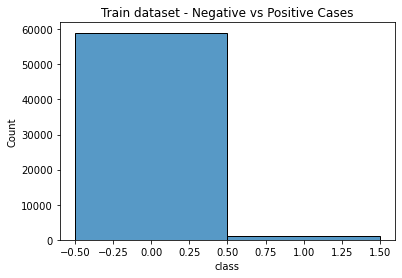

In [79]:
sns.histplot(train, x='class', discrete=True)
plt.title('Train dataset - Negative vs Positive Cases')
plt.show()

In [80]:
train['class'].value_counts(normalize=True)

0    0.983333
1    0.016667
Name: class, dtype: float64

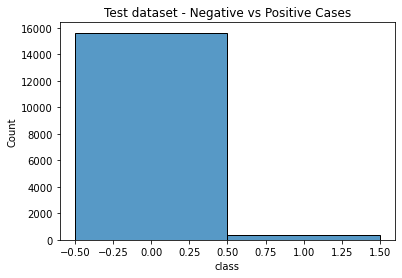

In [81]:
sns.histplot(test, x='class', discrete=True)
plt.title('Test dataset - Negative vs Positive Cases')
plt.show()

In [82]:
test['class'].value_counts(normalize=True)

0    0.976562
1    0.023438
Name: class, dtype: float64

# PCA

In [83]:
pca = PCA()
X_pca = pca.fit_transform(train.iloc[:,1:])

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170
0,2.407533,-1.275187,-1.550152,0.980419,-0.083018,0.754907,-0.471116,-0.001142,-0.185602,-1.329810,-0.883649,0.121454,-0.148878,-0.111163,0.016116,0.135454,0.123628,-0.001557,0.025475,0.467930,0.081595,-0.268380,-0.974192,-0.400328,-0.488292,0.193304,0.343310,0.186646,-0.370790,-0.515933,0.452733,0.972363,0.888995,0.467473,1.452572,0.227556,-0.052618,-0.161304,-0.097873,0.121170,-0.924456,-0.070024,0.571841,-0.292851,-0.139060,-0.760733,-0.275693,-1.048447,-0.493976,0.128133,0.026799,0.272491,0.197247,-0.210840,-0.121528,0.392499,0.601689,-0.761843,0.229725,-0.608480,-0.002311,0.226110,0.206524,0.495530,0.036608,0.153464,0.177848,-0.901058,-0.389198,-0.398031,-0.352271,-0.253151,-0.299811,0.189246,-0.115952,-0.649872,-0.098207,0.501070,0.461358,0.106849,-0.152670,-0.111830,-0.157571,-0.544931,-0.108767,0.224758,0.086524,-0.201799,0.357280,0.459535,0.057411,0.293610,0.357907,0.017792,0.064296,-0.304607,-0.347059,0.085569,-0.239143,-0.463856,-0.023215,-0.046024,-0.340348,0.677064,0.015487,0.265448,-0.448833,0.295679,-0.538035,-0.231553,-0.808844,-0.175312,0.109076,0.481541,0.370985,0.105856,-0.140711,-0.355000,-0.203113,-0.119438,0.016611,-0.064372,-0.175457,0.816525,-0.174034,-0.377466,0.859743,-0.006519,0.037496,0.166576,0.003984,0.149965,0.213059,0.021686,-0.461613,-0.102993,-0.088441,0.026991,0.010501,0.044857,0.168764,-0.187020,-0.149546,0.006613,-0.022776,-0.062827,0.075731,0.025376,-0.046847,-0.091988,-0.025821,0.022469,-0.014073,0.049730,0.020078,-0.003659,0.003660,-0.000792,-0.000564,-0.000296,-0.000485,-0.000007,-1.343745e-06,1.301428e-06,-0.000021,-0.000029,-5.097107e-07,2.164539e-07,2.589345e-07,2.517080e-16
1,-0.610388,-0.481413,0.008950,0.121946,-0.123178,0.102725,-0.184513,-0.000054,0.011270,0.100001,-0.104669,0.149230,-0.141246,-0.116292,0.028236,0.183129,-0.060965,0.018990,0.183105,0.277074,-0.041835,0.121719,-0.230144,-0.118378,-0.075131,0.068682,0.054419,-0.076535,-0.036788,-0.091829,-0.138441,-0.281925,-0.385997,-0.380277,-0.143156,-0.083448,-0.077716,-0.061297,0.016618,0.029242,-0.007231,-0.054664,0.030985,-0.011983,0.063002,0.238332,0.064141,0.127301,0.083859,0.086974,-0.000714,-0.074266,0.207559,-0.218752,0.196255,-0.048958,-0.150446,0.193235,0.071738,0.011705,0.146144,-0.060029,-0.211121,0.016534,0.054918,0.179352,0.108790,-0.051696,-0.197495,0.214485,-0.200928,-0.131535,-0.281064,-0.229433,0.043047,0.208372,-0.054231,-0.270740,-0.495809,0.040098,0.270760,-0.514386,-0.368559,0.754823,0.066002,-0.498541,-0.885843,-0.023117,0.684022,-0.503946,0.204332,0.051738,0.682977,0.914936,-0.309372,0.264907,0.299734,0.251114,0.477178,0.150236,-0.102080,-0.405490,-0.286402,0.078973,-0.159373,0.009749,0.299346,-0.078298,0.079064,-0.229008,0.277413,0.015648,-0.125102,0.154330,-0.340161,-0.168772,0.417036,-0.600638,-0.645024,-0.089504,0.020306,-0.213256,0.059389,-0.039685,0.032762,-0.053760,-0.002414,-0.039075,-0.021066,-0.003946,0.043254,-0.057935,0.001137,-0.054277,-0.022891,-0.004154,0.020541,-0.029742,-0.010523,0.016184,-0.015389,-0.005745,0.012028,-0.011327,-0.021296,-0.007265,-0.008508,0.002915,0.003840,0.013032,0.007807

## Loadings

In [84]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=train.iloc[:,1:].columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170
aa_000,0.126926,0.019358,-0.006151,-0.039820,-0.111147,-0.051256,-0.006223,-0.000609,-0.046904,-0.035778,0.041658,-0.075781,0.011435,0.020896,0.036714,-0.051404,0.044770,-0.031668,0.005489,0.012695,0.023637,-0.016341,0.046334,-0.003325,0.009711,0.003295,-0.016591,0.000787,-0.000405,0.023862,0.005010,-0.004720,0.029123,-0.026462,0.004118,0.031261,-0.004117,0.013250,-0.009940,0.004460,-0.005647,-0.005797,-0.013485,-0.022676,-0.013029,-0.003210,-0.032182,0.008268,-0.024097,-0.028762,0.025242,0.012216,0.031427,0.026934,-0.025786,-0.023591,0.001806,-0.021294,0.007785,0.017456,0.017080,-0.065842,-0.043293,0.044506,-0.028548,-0.014586,-0.035701,-0.029620,0.005616,-0.002198,-0.008303,0.012712,0.010479,-0.005296,-7.735172e-02,0.100469,-0.005744,-0.034711,-0.019371,-0.071332,0.054739,-0.023272,0.036728,-0.010488,0.021305,-0.025688,0.045432,0.026657,-0.224729,0.101165,-0.042378,-0.084020,0.018609,0.023664,-0.008838,-0.011631,-0.021102,0.018052,0.129345,-0.154398,-0.035584,-0.179142,-0.080197,0.027237,-0.034852,0.040792,0.121389,-0.067701,0.008775,0.025281,-0.008919,0.106586,0.100337,-0.023539,0.006930,0.045609,-0.007876,0.064361,-0.026063,-0.049382,-0.167323,-0.012015,-0.141386,0.049502,0.132445,-0.045614,-0.059556,0.003041,-0.022980,0.040464,0.016291,0.039503,0.033078,-0.001609,0.005661,-0.018243,0.115244,-0.091304,0.049285,0.041258,-6.625859e-03,0.043445,-0.039140,-4.703537e-02,-0.035031,-0.046984,0.033716,-0.085246,-0.284390,0.042399,0.002239,-0.021985,-1.747047e-02,-0.007915,0.019991,-0.000531,0.673977,-0.148086,-0.001571,-9.966624e-04,-0.000286,-2.183871e-05,-3.145541e-06,3.041201e-06,-4.504566e-06,5.747776e-07,7.269785e-07,9.188902e-08,1.780569e-09,-0.000000e+00
ab_000,0.005602,0.017128,-0.004403,0.017635,-0.006258,0.006620,0.005425,0.000481,0.004430,0.019805,-0.048572,0.012980,0.084397,0.021031,0.010711,0.020181,0.061338,-0.028063,-0.061405,0.006810,0.013028,0.033147,0.016392,0.015294,-0.057325,0.022605,-0.045425,-0.016438,0.158768,0.103061,-0.011369,0.200335,-0.212101,-0.102010,0.121738,0.031629,0.088138,-0.000755,0.007760,0.174910,-0.257545,0.666715,-0.040788,-0.127852,0.367886,-0.036257,0.058883,0.203355,0.059085,-0.064920,0.030156,-0.178933,0.017518,-0.050267,-0.113686,0.081803,0.019968,0.020146,0.034430,0.015734,-0.032984,0.027423,-0.008171,0.012557,0.020891,-0.029565,0.015844,-0.020640,0.008841,-0.021251,-0.012392,0.002900,0.012720,0.020907,7.317096e-03,-0.008288,0.012926,-0.043873,0.002064,0.007894,-0.026038,-0.014194,-0.004325,0.007480,0.001954,0.005361,-0.004718,-0.007906,-0.018361,0.002553,-0.002622,0.001741,0.002468,-0.015131,0.004290,-0.000916,-0.005310,0.014066,0.008141,0.007419,-0.001938,-0.003918,-0.012749,-0.003750,0.007120,0.003526,-0.005444,0.008896,0.003311,-0.007432,-0.005513,0.003441,0.002414,0.001337,-0.007932,0.001867,0.002764,0.007179,0.003286,-0.002399,-0.005205,0.000236,-0.000979,-0.005260,0.002872,-0.001744,-0.001323,0.001287,0.006457,0.001335,0.005665,-0.000264,-0.000758,0.002506,0.001394,0.005727,0.000195,-0.002625,0.005281,-0.001030,-7.419904e-04,-0.002919,0.003362,2.118180e-03,0.000673,-0.004959,-0.000357

# Mutual Information

In [85]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [86]:
y = test['class']
X = test.drop('class', axis=1)
mi_scores = make_mi_scores(X, y, discrete_features=False)
mi_scores

bp_000    0.065496
ci_000    0.064984
dn_000    0.064570
aa_000    0.064305
bt_000    0.064137
            ...   
cr_000    0.000000
ay_009    0.000000
cs_009    0.000000
db_000    0.000000
az_009    0.000000
Name: MI Scores, Length: 170, dtype: float64

These are the first thirty features to take into account as they seem to be more related to the target.

In [88]:
mi_scores.head(30)

bp_000    0.065496
ci_000    0.064984
dn_000    0.064570
aa_000    0.064305
bt_000    0.064137
ck_000    0.064003
bj_000    0.063330
bu_000    0.062976
aq_000    0.062625
bb_000    0.061809
bv_000    0.061767
cq_000    0.061733
ah_000    0.060749
bx_000    0.060716
az_001    0.059938
an_000    0.059910
cs_004    0.059840
bg_000    0.059820
ap_000    0.059525
bh_000    0.059180
by_000    0.058725
ba_004    0.058582
ao_000    0.058343
az_002    0.057865
cs_002    0.056810
cc_000    0.055894
ee_000    0.055252
ba_000    0.055109
cs_003    0.054916
bi_000    0.054733
Name: MI Scores, dtype: float64